In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1-Data Exploration

In [221]:
#lets import the train and test dataset and print them
bigdata_train=pd.read_csv('bigdatamart_train.csv')
bigdata_test=pd.read_csv('bigdatamart_test.csv')
print(bigdata_train)
print(bigdata_test)
print(bigdata_train.shape)
print(bigdata_test.shape)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [222]:
#lets print the input data information
print(bigdata_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [223]:
#lets print the output data information
print(bigdata_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [224]:
#lets print the train data descrption
print(bigdata_train.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [225]:
#lets print the test data descrption
print(bigdata_test.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


In [226]:
#lets check the null values of train data
print(pd.isnull(bigdata_train).sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [227]:
#lets check the null values of test data
print(pd.isnull(bigdata_test).sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [228]:
#so here both train and test data has only two columns missing value.
#so to explore data better we can append both train and test data. 
#So we will combine both train and test for our dayta analysis and for data visualization,
#feature engineering, one-hot encoding, and label encoding. 
#Later we will split this combined data back to train and test datasets.
bigdata_train['source']='train'
bigdata_test['source']='test'
bigdata_test['Item_Outlet_Sales'] = 0
combidata = pd.concat([bigdata_train,bigdata_test],sort=False)
print(bigdata_train.shape)
print(bigdata_test.shape)
print(combidata.shape)

(8523, 13)
(5681, 13)
(14204, 13)


In [229]:
#lets check the null values of combidata
print(pd.isnull(combidata).sum())

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


In [230]:
#lets print the test data descrption
print(combidata.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         1308.865489  
std          1699.791423  
min             0.000000  
25%             0.000000  
50%           559.272000  
75%          2163.184200  
max         13086.964800  


In [231]:
#lets see the categorical variable, and the number of unique values in each of them.
combidata.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

# 2-Data Cleaning

In [232]:
#so here in the dataset there are only two columns missing value.so lets fill those.
# 1st Item_Weight and lets fill that by the average weight of the particular item.

data=[combidata]
for dataset in data:
    mean = combidata["Item_Weight"].mean()
    std = combidata["Item_Weight"].std()
    is_null = dataset["Item_Weight"].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    rand_weight = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Age column
    weight_slice = combidata["Item_Weight"].copy()
    weight_slice[np.isnan(weight_slice)] = rand_weight
    combidata["Item_Weight"] = weight_slice
    combidata["Item_Weight"] = combidata["Item_Weight"].astype(int)

In [233]:
#lets print the Item_Weight descrption
print(combidata["Item_Weight"].describe())

count    14204.000000
mean        12.274571
std          4.396631
min          4.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         21.000000
Name: Item_Weight, dtype: float64


In [234]:
#lets check the null values of combidata
print(pd.isnull(combidata).sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


In [235]:
#lets print the Outlet_Size descrption
combidata['Outlet_Size'].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [236]:
# 2nd  Outlet_Size and lets fill that by the mode of the Outlet_Size for the particular type of outlet.
data=[combidata]
for dataset in data:
    #mode = combidata['Outlet_Size'].mode()
    #combidata['Outlet_Size'] = data['Native Country'].fillna(data['Native Country'].mode()[0])
    combidata['Outlet_Size']=combidata['Outlet_Size'].fillna(combidata['Outlet_Size'].mode()[0])

In [237]:
#lets print the Outlet_Size descrption
combidata['Outlet_Size'].describe()

count      14204
unique         3
top       Medium
freq        8671
Name: Outlet_Size, dtype: object

In [238]:
#lets check the null values of combidata
print(pd.isnull(combidata).sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64


# 3-Feature Engineering

In [261]:
#lets print the data information
print(combidata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  int32  
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Outlet_Years               14204 non-null  int6

In [262]:
#lets print the Item_Identifier descrption
combidata['Item_Identifier'].describe()

count     14204
unique     1559
top       NCR30
freq         10
Name: Item_Identifier, dtype: object

In [263]:
#lets print the Item_Fat_Content descrption
combidata['Item_Fat_Content'].describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [264]:
#lets print the Item_Type descrption
combidata['Item_Type'].describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [265]:
#lets print the Outlet_Identifier descrption
combidata['Outlet_Identifier'].describe()

count      14204
unique        10
top       OUT027
freq        1559
Name: Outlet_Identifier, dtype: object

In [266]:
#lets print the Outlet_Size descrption
combidata['Outlet_Size'].describe()

count      14204
unique         3
top       Medium
freq        8671
Name: Outlet_Size, dtype: object

In [267]:
#lets print the Outlet_Location_Type descrption
combidata['Outlet_Location_Type'].describe()

count      14204
unique         3
top       Tier 3
freq        5583
Name: Outlet_Location_Type, dtype: object

In [268]:
#lets print the Outlet_Type descrption
combidata['Outlet_Type'].describe()

count                 14204
unique                    4
top       Supermarket Type1
freq                   9294
Name: Outlet_Type, dtype: object

In [270]:
# lets convert the Outlet_Establishment_Year to Outlet_Years, so it will be eassy for our model building
combidata['Outlet_Years'] = 2013 - combidata['Outlet_Establishment_Year']
combidata['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [271]:
#lets see all the numerical attributes in the dataset
numerical_features = combidata.select_dtypes(include=[np.number])
numerical_features.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9,0.016047,249.8092,1999,3735.1380,14
1,5,0.019278,48.2692,2009,443.4228,4
2,17,0.016760,141.6180,1999,2097.2700,14
3,19,0.000000,182.0950,1998,732.3800,15
4,8,0.000000,53.8614,1987,994.7052,26


In [272]:
#lets see all the categorical attributes in the dataset
categorial_features = combidata.select_dtypes(include=[np.object])
categorial_features.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [273]:
# Now we saw all the above attributes are more than 2 unique values,
# Hence, label encoding will not work for them, so we will go for one hot encoding technique.
# lets encode all the input values using one hot encoding

from sklearn.preprocessing import OneHotEncoder

combidata_encode = pd.get_dummies(combidata, columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
combidata_encode.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0.016047,249.8092,1999,3735.1380,train,14,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5,0.019278,48.2692,2009,443.4228,train,4,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17,0.016760,141.6180,1999,2097.2700,train,14,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19,0.000000,182.0950,1998,732.3800,train,15,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8,0.000000,53.8614,1987,994.7052,train,26,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [275]:
#lets print the data information
print(combidata_encode.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Columns: 1607 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(3), int32(1), int64(2), object(1), uint8(1600)
memory usage: 22.5+ MB
None


In [276]:
# Now our data is ready for model building, so lets drop all columns which are not required

combidata_encode.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
combidata_encode.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Outlet_Years,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0.016047,249.8092,3735.1380,train,14,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5,0.019278,48.2692,443.4228,train,4,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17,0.016760,141.6180,2097.2700,train,14,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19,0.000000,182.0950,732.3800,train,15,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8,0.000000,53.8614,994.7052,train,26,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [277]:
# split it to original train and test dataset
fbigdata_train = combidata_encode.loc[combidata_encode['source']=="train"]
fbigdata_test = combidata_encode.loc[combidata_encode['source']=="test"]


In [278]:
#Drop the columns added intial point

fbigdata_train.drop(['source'],axis=1,inplace=True)
fbigdata_test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [279]:
#Now Export the final dataset:
fbigdata_train.to_csv("fbigdata_train.csv",index=False)
fbigdata_test.to_csv("fbigdata_test.csv",index=False)

# 4-Model Building

In [280]:
#lets import the final train and test dataset and print them
btrain=pd.read_csv('fbigdata_train.csv')
btest=pd.read_csv('fbigdata_test.csv')

print(btrain.shape)
print(btest.shape)

(8523, 1605)
(5681, 1604)


In [281]:
btrain.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0.016047,249.8092,3735.1380,14,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5,0.019278,48.2692,443.4228,4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17,0.016760,141.6180,2097.2700,14,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19,0.000000,182.0950,732.3800,15,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8,0.000000,53.8614,994.7052,26,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [282]:
btest.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20,0.007565,107.8622,14,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,0.038428,87.3198,6,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14,0.099575,241.7538,15,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7,0.015388,155.0340,6,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,13,0.118599,234.2300,28,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [284]:
# separating the input and output/target variables of dtrain
import numpy as np
x=btrain.drop(columns=['Item_Outlet_Sales'],axis=1)
y=btrain[['Item_Outlet_Sales']]

print(x.shape)
print(y.shape)

(8523, 1604)
(8523, 1)


In [286]:
z=btest

print(z.shape)

(5681, 1604)


In [290]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso(alpha=0.1)
from sklearn.linear_model import Ridge
lrreg=Ridge(alpha=0.1)
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [291]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [292]:
#printing the output of each model
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('Maximum R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 66


Maximum R2 Score is: 0.45057640954684164




************************ KNeighborsRegressor **********************


Final Random State is: 45


Maximum R2 Score is: 0.49490357477807045




************************ Lasso **********************


Final Random State is: 89


Maximum R2 Score is: 0.5078343767990576




************************ Ridge **********************


Final Random State is: 89


Maximum R2 Score is: 0.46552872466072714




************************ GradientBoostingRegressor **********************


Final Random State is: 76


Maximum R2 Score is: 0.6272037477141408




************************ AdaBoostRegressor **********************


Final Random State is: 54


Maximum R2 Score is: 0.5550849146499904




************************ RandomForestRegressor **********************


Final Random State is: 69


Maximum R2 Score is: 0.583408646766993






In [297]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            66  45.057641
1        KNeighborsRegressor            45  49.490357
2                      Lasso            89  50.783438
3                      Ridge            89  46.552872
4  GradientBoostingRegressor            76  62.720375
5          AdaBoostRegressor            54  55.508491
6      RandomForestRegressor            69  58.340865


In [298]:
# So here GradientBoostingRegressor is the best model, so the Final Model at random_state=76
#lets try boosting algorithm to find the and we will use GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[10,100,500]}
clf=GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [300]:
# So here linear Regression is the best model, so the Final Model at random_state=68
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [301]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of GradientBoostingRegressor is:', cross_val_score(gbr,x,y,cv=5,scoring='r2'.mean()))
print('Standard Deviation of GradientBoostingRegressor is:',cross_val_score(gbr,x,y,cv=5,scoring='r2'.std()))

AttributeError: 'str' object has no attribute 'mean'

In [302]:
#Evaluating the Final Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print('r2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.588053964621797
RMSE is: 1102.4396218043673


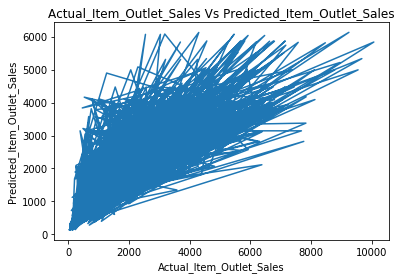

In [303]:
#In conclusion, our happiness score for world happiness report can be used using the Linear regression model above.
# so it seems there are above 99% people are happy those who are staying in thier country or area.
Actual_Item_Outlet_Sales=y_test
Predicted_Item_Outlet_Sales=y_pred
plt.title('Actual_Item_Outlet_Sales Vs Predicted_Item_Outlet_Sales')
plt.xlabel('Actual_Item_Outlet_Sales')
plt.ylabel('Predicted_Item_Outlet_Sales')
plt.plot(Actual_Item_Outlet_Sales, Predicted_Item_Outlet_Sales)
plt.show()

In [304]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gbr,'gbr_bigmart_sales.obj')

['gbr_bigmart_sales.obj']

In [305]:
# load the model from the file
gbr_from_joblib=joblib.load('gbr_bigmart_sales.obj')

In [306]:
#Use the loaded model to make predictionsdtc_from_joblib.predict(x_test)
gbr_from_joblib.predict(x_test)

array([3113.23597814, 4086.61218105, 5083.44615592, ..., 1931.78507627,
       2623.45194048, 3143.56282456])

In [307]:
#lets predict the model with test dataset which provided initially
gbr_from_joblib.predict(z)

array([1700.25794268, 1366.07259542,  660.10302645, ..., 1931.78507627,
       3377.19611144, 1291.92729727])